## Analysing Patterns within Indian Startup Funding ecosystem

* **How Does the Funding Ecosystem changed with respect to Time?**
* **Amount of Funding Startups get in India.**
* **Favourable Startup Industry Verticals (in terms of total funds received).**
* **Favourable Startup Industry Verticals (in terms of number of funds received).**
* **Importance of Location for a Startup in receiving funding.**
* **Who plays the main role in Indian Startups Ecosystem?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [3]:
# background style selection
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

In [4]:
# Reading the data
data = pd.read_csv("startup_funding.csv") 
##pd.set_option("display.max_rows",None)
##pd.options.display.max_rows
data.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [6]:
# Adjusting the column names
data.columns = ['SrNo', 'Date', 'StartupName', 'IndustryVertical',
       'SubVertical', 'CityLocation', 'InvestorName', 'InvestmentType',
       'AmountInUSD', 'Remarks']
data.head()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [7]:
#Checking Null value %
(data.isnull().sum()/data.shape[0])*100

SrNo                 0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     5.617608
SubVertical         30.749014
CityLocation         5.913272
InvestorName         0.788436
InvestmentType       0.131406
AmountInUSD         31.537451
Remarks             86.235217
dtype: float64

In [8]:
# Since 86% of remark column has Null values, hence we can drop it.

data = data.drop("Remarks", axis=1)
data.head()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorName,InvestmentType,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [9]:
# lets clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# lets apply the function to clean the data
for col in  ['SrNo', 'Date', 'StartupName', 'IndustryVertical',
       'SubVertical', 'CityLocation', 'InvestorName', 'InvestmentType',
       'AmountInUSD']:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
    
data.head()

,SrNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorName,InvestmentType,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [10]:
# Handling the AmountInUSD column

for i in data['AmountInUSD'].unique():
    if i==0 or i=='0':
        print("O is present")
        
data['AmountInUSD'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [11]:
# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([char for char in str(x) if char in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
#     x = str(x).replace(",","").replace("+","")
#     x = str(x).lower().replace("undisclosed","")
#     x = str(x).lower().replace("n/a","")
    if x == '':
        x = 0
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

In [12]:
data['AmountInUSD'].value_counts()

0.0            971
1000000.0      166
500000.0       108
2000000.0       69
5000000.0       67
              ... 
47000000.0       1
191000.0         1
5850000.0        1
226000000.0      1
14680000.0       1
Name: AmountInUSD, Length: 458, dtype: int64

In [13]:
# Cleaning the Date Column
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015' 
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015' 
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015' 
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015' 
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'

<ipython-input-13-df7d9a0742f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][data['Date']=='05/072018'] = '05/07/2018'
<ipython-input-13-df7d9a0742f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
<ipython-input-13-df7d9a0742f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
<ipython-input-13-df7d9a0742f4

## How Does the Funding Ecosystem changed with respect to Time?

In [14]:
# Converting Date into DateTime objects

data['YearMonth'] = (pd.to_datetime(data['Date'], format = '%d/%m/%Y').dt.year*100) + (pd.to_datetime(data['Date'], format = '%d/%m/%Y').dt.month)

temp = data['YearMonth'].value_counts().head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: YearMonth, dtype: int64


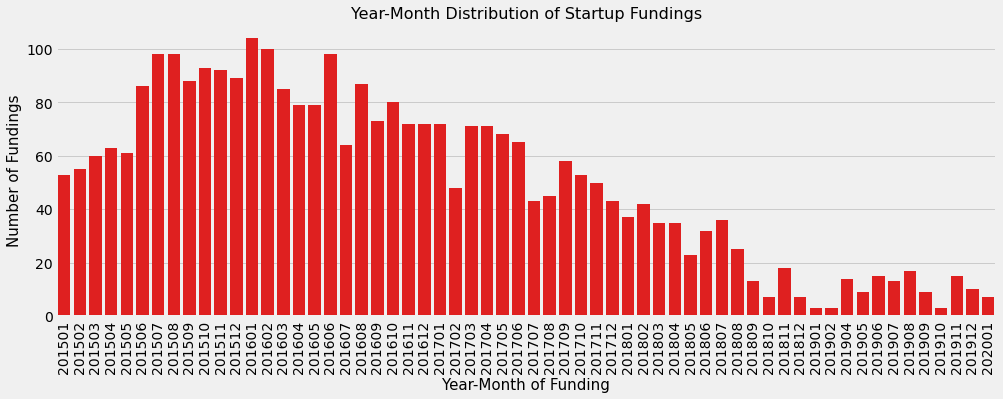

In [15]:
# Plotting chart to visualise Funding trend with respect to YearMonth
YearMonth = data['YearMonth'].value_counts()
plt.rcParams['figure.figsize']=(15,5)
sns.barplot(YearMonth.index, YearMonth.values, color = "Red")
plt.xticks(rotation='90')
plt.title("Year-Month Distribution of Startup Fundings", fontsize=16)
plt.xlabel("Year-Month of Funding", fontsize=15)
plt.ylabel("Number of Fundings", fontsize = 15)
plt.show()


##### We observe maximum fundings to happen during 2015-16

## Amount of Funding Startups get in India

In [23]:
avg_funding = data.groupby(by=['StartupName'])['AmountInUSD'].mean().sort_values(ascending=False).head(50)
avg_funding

StartupName
Rapido Bike Taxi            3.900000e+09
Flipkart                    8.119400e+08
Pratilipi                   7.576250e+08
Flipkart.com                7.000000e+08
True North                  6.000000e+08
Paytm                       4.498500e+08
Olacabs                     4.000000e+08
Snapdeal                    3.500000e+08
Automation Anywhere         3.000000e+08
Vogo Automotive             2.830000e+08
Sistema.bio                 2.739035e+08
Edelweiss                   2.700000e+08
FabHotels                   2.484988e+08
Ola                         2.461250e+08
Lenskart.com                2.310000e+08
Digital Mall Asia           2.200000e+08
Udaan                       2.175000e+08
Paytm Marketplace           2.000000e+08
Furtados School of Music    2.000000e+08
Epiq Capital                2.000000e+08
BYJU’S                      2.000000e+08
Oyo Rooms                   1.750000e+08
Hike                        1.750000e+08
Freshworks                  1.500000e+08
GOQi

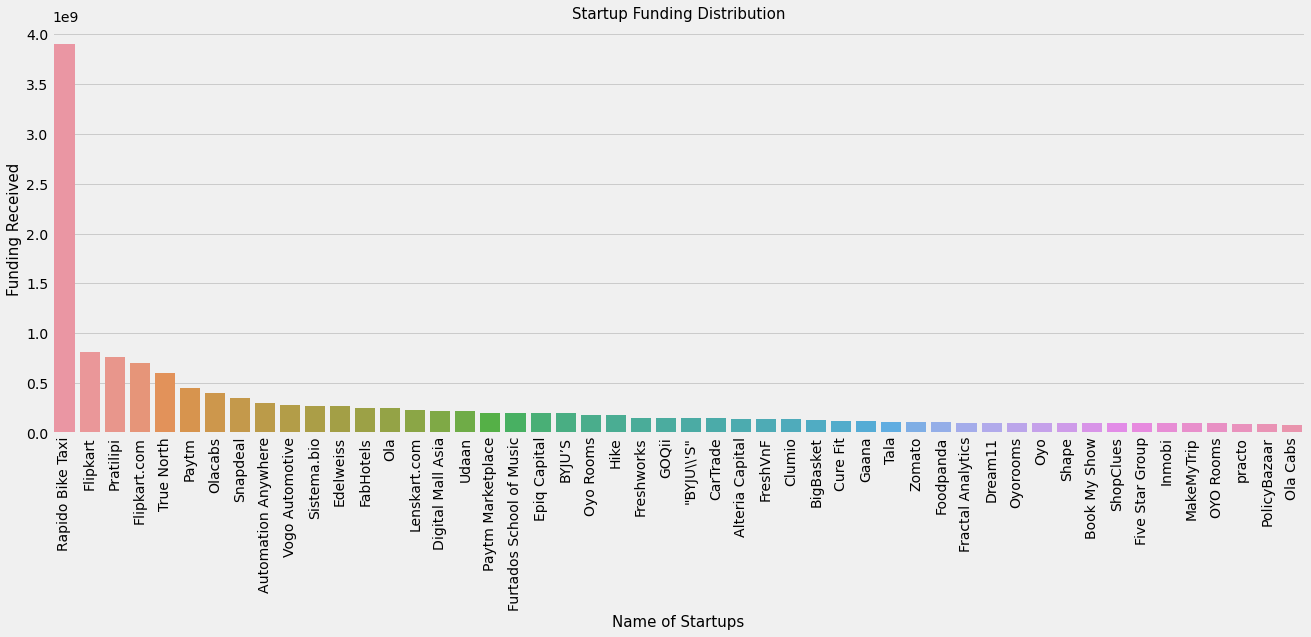

In [24]:
# Plotting the amount of funding received by Startups

plt.rcParams['figure.figsize']= (20,7)
sns.barplot(avg_funding.index, avg_funding.values)
plt.xlabel("Name of Startups", fontsize=15)
plt.ylabel("Funding Received", fontsize=15)
plt.title("Startup Funding Distribution", fontsize = 15)
plt.xticks(rotation='90')

plt.show()

## Favourable Startup Industry Verticals (in terms of total funds received) 

In [26]:
data['IndustryVertical'] = data['IndustryVertical'].replace("nan","Consumer Technology")

In [27]:
fav_ind_vert = data.groupby(by=['IndustryVertical'])['AmountInUSD'].mean().sort_values(ascending=False).head(50)
fav_ind_vert

IndustryVertical
Transportation                                9.791581e+08
Digital Media                                 7.556901e+08
E-Commerce & M-Commerce platform              6.800000e+08
Ecommerce Marketplace                         5.000000e+08
Car Aggregator & Retail Mobile App            5.000000e+08
Cab Aggregator                                4.000000e+08
Online Marketplace                            3.500715e+08
Automation                                    3.000000e+08
B2B                                           2.935000e+08
B2B Platform                                  2.250000e+08
E-Tech                                        2.000000e+08
Online Classifieds                            1.500000e+08
Last Mile Transportation                      1.416500e+08
Agtech                                        1.400000e+08
Agriculture                                   1.372017e+08
Logistics Solution Provider                   1.370000e+08
FinTech                                

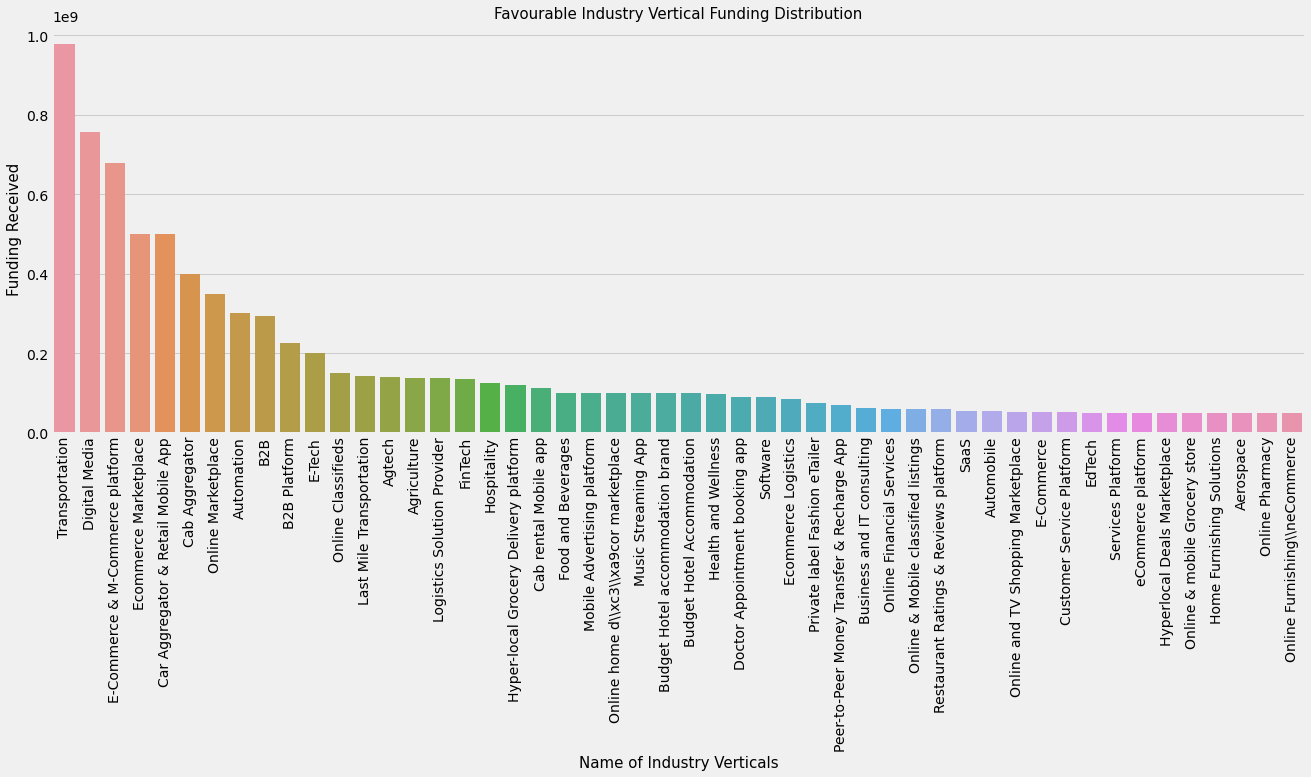

In [28]:
# Plotting the favourable Startrup Industry Verticals( in terms of total funds received)

plt.rcParams['figure.figsize']= (20,7)
sns.barplot(fav_ind_vert.index, fav_ind_vert.values)
plt.xlabel("Name of Industry Verticals", fontsize=15)
plt.ylabel("Funding Received", fontsize=15)
plt.title("Favourable Industry Vertical Funding Distribution", fontsize = 15)
plt.xticks(rotation='90')

plt.show()

## Favourable Startup Industry Verticals (in terms of number of funds received) 

In [36]:
num_ind_vert = data['IndustryVertical'].value_counts().sort_values(ascending=False).head(15)
num_ind_vert

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Food & Beverage         23
Ed-Tech                 14
E-commerce              12
FinTech                  9
IT                       8
Name: IndustryVertical, dtype: int64

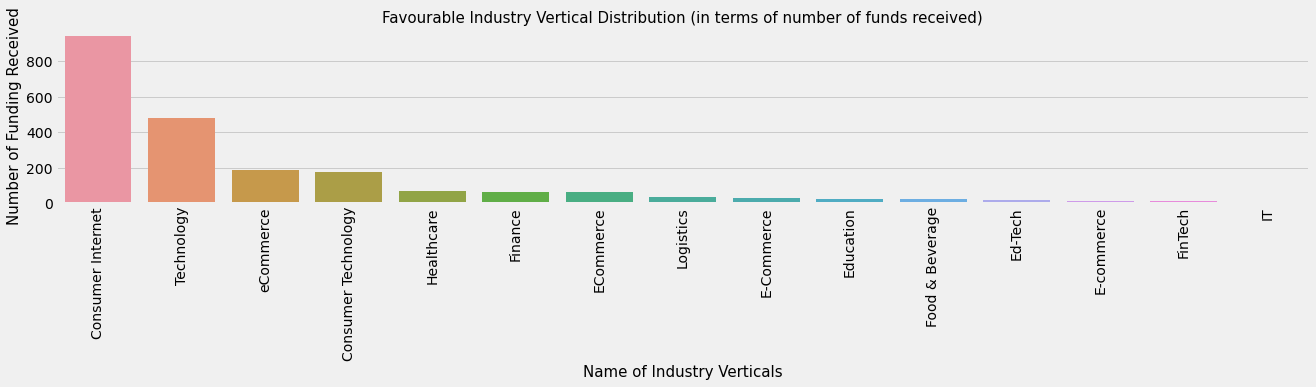

In [38]:
# Plotting the favourable Startrup Industry Verticals( in terms of number of funds received)

plt.rcParams['figure.figsize']= (20,3)
sns.barplot(num_ind_vert.index, num_ind_vert.values)
plt.xlabel("Name of Industry Verticals", fontsize=15)
plt.ylabel("Number of Funding Received", fontsize=15)
plt.title("Favourable Industry Vertical Distribution (in terms of number of funds received)", fontsize = 15)
plt.xticks(rotation='90')

plt.show()

## Importance of Location for a Startup in receiving funding.

Bengaluru    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: CityLocation, dtype: int64


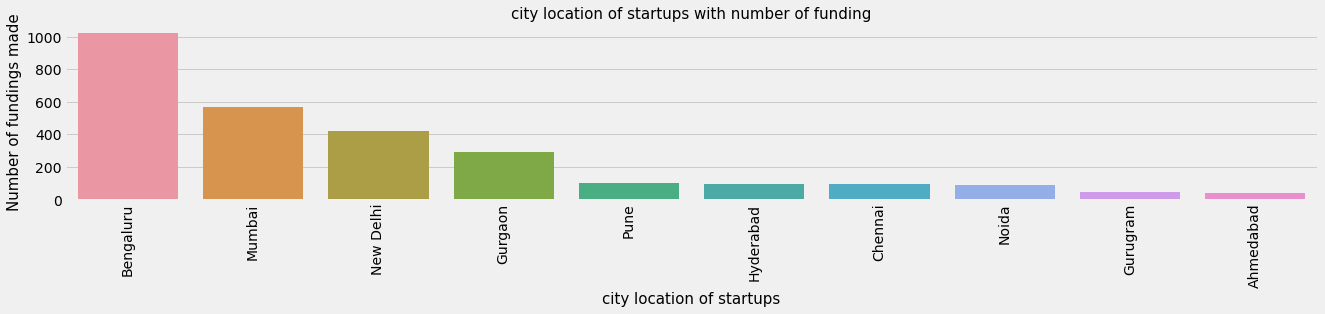

In [41]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['CityLocation'] = data['CityLocation'].replace(('Bangalore', 'nan'),('Bengaluru', 'Bengaluru'))

city = data['CityLocation'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values)
plt.xlabel('city location of startups', fontsize=15)
plt.ylabel('Number of fundings made', fontsize=15)
plt.title("city location of startups with number of funding", fontsize=15)
plt.xticks(rotation='90')
plt.show()

## Who plays the main role in Indian Startups Ecosystem?

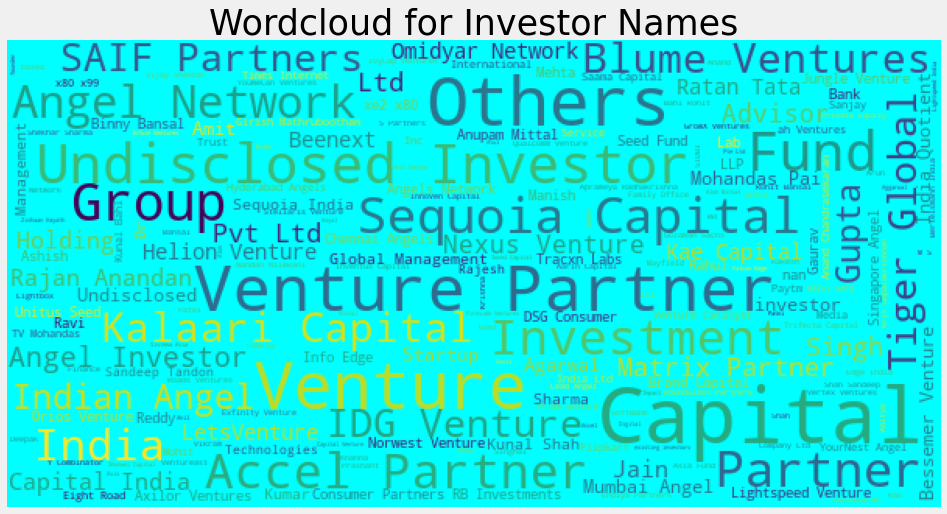

In [43]:
from wordcloud import WordCloud

names = data["InvestorName"][~pd.isnull(data["InvestorName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

## Top 10 StartUps in Bengaluru

In [48]:
data[['StartupName','IndustryVertical','AmountInUSD']][data['CityLocation']=='Bengaluru'].sort_values(by=['AmountInUSD'], ascending=False).head(10)

,StartupName,IndustryVertical,AmountInUSD
60,Rapido Bike Taxi,Transportation,3.900000e+09
651,Flipkart,eCommerce,2.500000e+09
83,Pratilipi,Digital Media,1.510950e+09
830,Paytm,ECommerce,1.400000e+09
966,Flipkart,eCommerce,1.400000e+09
2648,Flipkart.com,Online Marketplace,7.000000e+08
33,Udaan,B2B,5.850000e+08
2244,Ola,Car Aggregator & Retail Mobile App,5.000000e+08
2820,Olacabs,Cab Aggregator,4.000000e+08
924,Ola,Consumer Internet,3.300000e+08
